### ***Data Scientist Assignment***

# ***Data loading & Cleaning***

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('/content/Data_Science_interview - Data_Science_interview (1).csv')
df


,Unnamed: 0,Message,Unnamed: 2,Unnamed: 3
0,0,❗️New users are restricted until they ➡️ [CLIC...,NaN,NaN
1,1,...............❗️Warning❗️...............\n❗PL...,NaN,NaN
2,2,Do you see wyckoff on chart?,NaN,NaN
3,3,Kraken allowed PayPal ser,NaN,NaN
4,4,I think the real crypto bullrun maybe starting...,NaN,NaN
...,...,...,...,...
105,105,NaN,NaN,NaN
106,106,its ltc,NaN,NaN
107,107,the silver to Bitcoin's gold.,NaN,NaN
108,108,was top 3 six years ago as well,NaN,NaN


In [82]:
df = df.drop(['Unnamed: 2','Unnamed: 3'] ,axis=1)
df = df.rename(columns={"Unnamed: 0": "S.No"})
df

,S.No,Message
0,0,❗️New users are restricted until they ➡️ [CLIC...
1,1,...............❗️Warning❗️...............\n❗PL...
2,2,Do you see wyckoff on chart?
3,3,Kraken allowed PayPal ser
4,4,I think the real crypto bullrun maybe starting...
...,...,...
105,105,NaN
106,106,its ltc
107,107,the silver to Bitcoin's gold.
108,108,was top 3 six years ago as well


Drop NaN

In [88]:
df = df.dropna()
df.isnull().sum()

,0
S.No,0
Message,0


Drop Dupicates

In [89]:
df = df.drop_duplicates()
df['Message'].nunique()

75

In [90]:
df

,S.No,Message
0,0,❗️New users are restricted until they ➡️ [CLIC...
1,1,...............❗️Warning❗️...............\n❗PL...
2,2,Do you see wyckoff on chart?
3,3,Kraken allowed PayPal ser
4,4,I think the real crypto bullrun maybe starting...
...,...,...
104,104,Ratio
106,106,its ltc
107,107,the silver to Bitcoin's gold.
108,108,was top 3 six years ago as well


### ***Visualize the Messages data***

Wordcloud for the words presnt int the messages

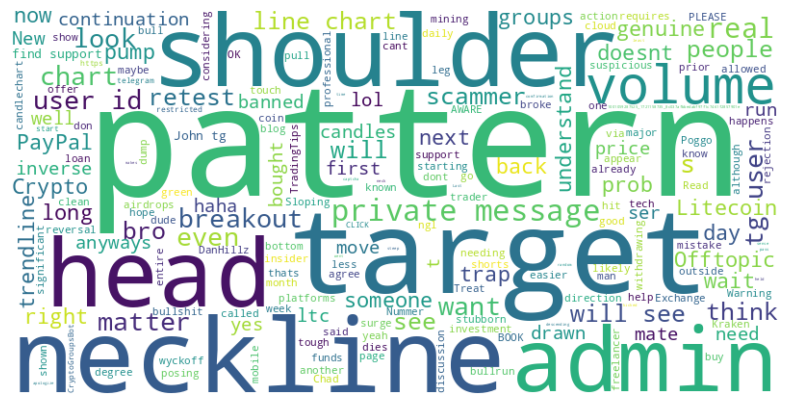

In [56]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(message for message in df['Message'] if isinstance(message, str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Visualize top 20 words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


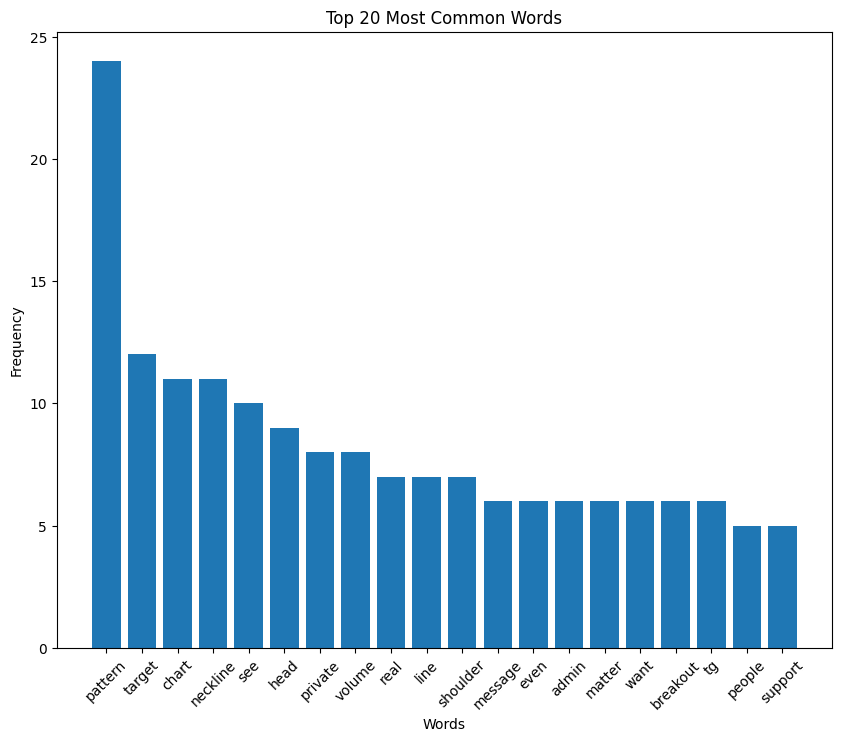

In [57]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

words = []
for message in df['Message']:
    if isinstance(message, str):
        tokens = word_tokenize(message)
        words.extend([word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words])
word_counts = Counter(words)

most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 8))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()


Visulaize the mesages based on length

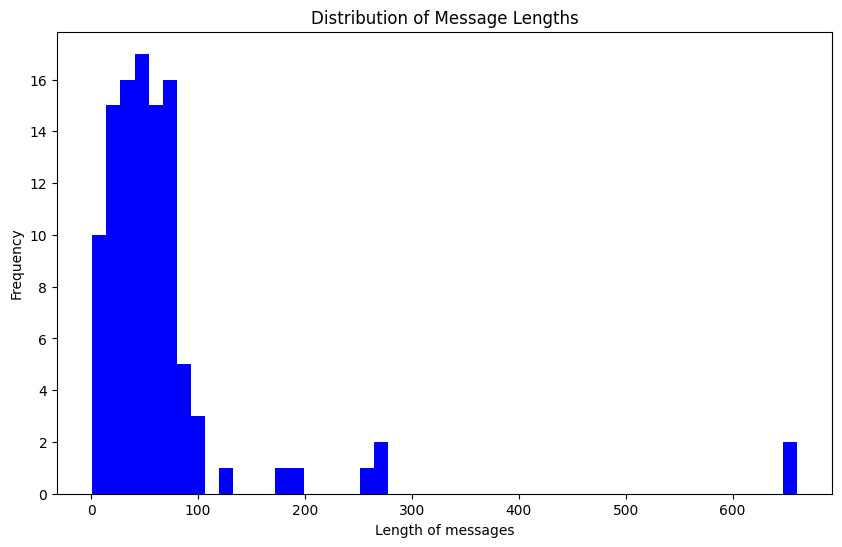

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

df['Message Length'] = df['Message'].apply(lambda x: len(str(x)))

plt.figure(figsize=(10, 6))
df['Message Length'].plot(kind='hist', bins=50, color='blue')
plt.title('Distribution of Message Lengths')
plt.xlabel('Length of messages')
plt.ylabel('Frequency')
plt.show()


Using box plot

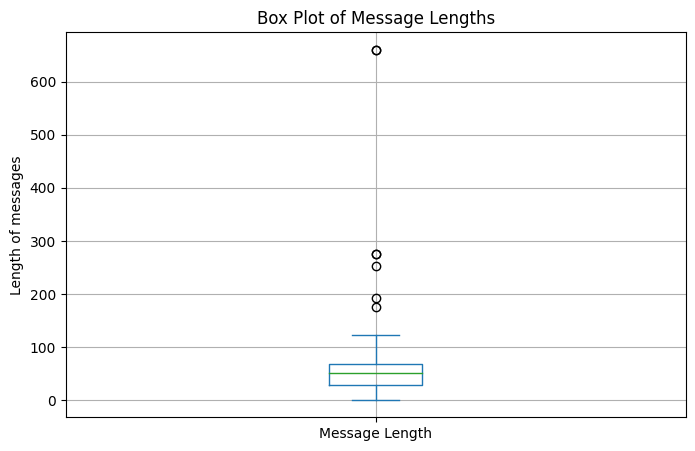

In [65]:

plt.figure(figsize=(8, 5))
df['Message Length'].plot(kind='box')
plt.title('Box Plot of Message Lengths')
plt.ylabel('Length of messages')
plt.grid(True)
plt.show()


### ***Feature  -- >***
## Use text summarization techniques to provide concise summaries of lengthy messages, useful for quick reviews.

In [93]:
from transformers import pipeline
import pandas as pd

class TextSummarizer:
    def __init__(self, model_name="facebook/bart-large-cnn"):
        self.summarizer = pipeline("summarization", model=model_name)

    def summarize_text(self, texts, max_length=35, min_length=30):
        summaries = []
        for text in texts:
            try:
                summary = self.summarizer(text, max_length=max_length, min_length=min_length, truncation=True)
                summaries.append(summary[0]['summary_text'])
            except Exception as e:
                summaries.append(f"Error summarizing text: {str(e)}")
        return summaries

    def display_summaries(self, data):
        data = df
        # Assume the column containing text is named 'Message'
        data['Message Length'] = data['Message'].apply(lambda x: len(str(x)))
        filtered_texts = data[(data['Message Length'] >= 150)]['Message'].tolist()

        summaries = self.summarize_text(filtered_texts)
        for text, summary in zip(filtered_texts, summaries):
            print(f"Original Text: {text}\nSummarized Text: {summary}\n\n\n")

data = df
summarizer = TextSummarizer()
summarizer.display_summaries(data)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Original Text: ❗️New users are restricted until they ➡️ [CLICK HERE](https://telegram.me/CryptoGroupsBot?start=-1001059287525_1721158735_8c037afbbedabf97f1c7461f2857901e) ⬅️ and pass the captcha or be kicked.
Summarized Text: New users are restricted until they pass the captcha or be kicked. New users will be kicked if they don't pass the captchas.



Original Text: ...............❗️Warning❗️...............
❗PLEASE BE AWARE OF SCAMMERS who private message people about investment platforms, insider groups, airdrops, cloud or mobile mining, pump & dump groups, needing a loan or help withdrawing funds even if they look like an admin or someone you know or someone well known, no matter how genuine they appear. 

❗No genuine Admin will ever private message you, it will be a scammer posing as an admin.

❗Admins DO NOT offer tech support via private message 

❗Treat all private messages as suspicious 

❗New to Crypto? Read @TradingTips 

❗Offtopic discussion in @OffTopic
---------------------

## Use Case code to test it

In [76]:
from transformers import pipeline

class TextSummarizer:
    def __init__(self, model_name="t5-small"):
        self.summarizer = pipeline("summarization", model=model_name)

    def summarize_text(self, texts, max_length=130, min_length=40):
        summaries = []
        for text in texts:
            try:
                summary = self.summarizer(text, max_length=max_length, min_length=min_length, truncation=True)
                summaries.append(summary[0]['summary_text'])
            except Exception as e:
                summaries.append(f"Error summarizing text: {str(e)}")
        return summaries

    def display_summaries(self, texts):
        summaries = self.summarize_text(texts)
        for text, summary in zip(texts, summaries):
            print(f"Original Text: {text}\nSummarized Text: {summary}\n")

# Example usage
texts = [
    "❗️Warning❗️ ❗PLEASE BE AWARE OF SCAMMERS who private message people about investment platforms, insider groups, airdrops, cloud or mobile mining, pump & dump groups, needing a loan or help withdrawing funds even if they look like an admin or someone you know or someone well known, no matter how genuine they appear. ❗No genuine Admin will ever private message you, it will be a scammer posing as an admin.❗Admins DO NOT offer tech support via private message ❗Treat all private messages as suspicious ❗New to Crypto? Read @TradingTips ❗Offtopic discussion in @OffTopic"

]

summarizer = TextSummarizer()
summarizer.display_summaries(texts)


Original Text: ❗️Warning❗️ ❗PLEASE BE AWARE OF SCAMMERS who private message people about investment platforms, insider groups, airdrops, cloud or mobile mining, pump & dump groups, needing a loan or help withdrawing funds even if they look like an admin or someone you know or someone well known, no matter how genuine they appear. ❗No genuine Admin will ever private message you, it will be a scammer posing as an admin.❗Admins DO NOT offer tech support via private message ❗Treat all private messages as suspicious ❗New to Crypto? Read @TradingTips ❗Offtopic discussion in @OffTopic
Summarized Text: 'No genuine Admin will ever private message you, it will be a scammer posing as an admin' Admins DO NOT offer tech support via private message .

